**NOTE:** You probably will see warnings. These are not errors! However, you should read them and try to understand why they're there. Can you fix them?

![](http://rentinginla.com/wp-content/uploads/2015/12/Buying.jpg)
# [Project 2: Predicting House Prices with Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

The goal of this project is for you to use EDA, visualization, data cleaning, preprocesing, and linear models to predict home prices given the features of the home, and interpret your linear models to find out what features add value to a home! This project is a bit more open-ended than project 1. 

Be sure to ...

* Think about your choices when it comes to your choices about the data. Be ready to defend your decisions!
* Use lots of plots to dig deeper into the data! Describe the plots and convey what you learned from them.
* Don't forget to read the [description of the data](../data_description.txt) (also available at the kaggle website)! This has valuable information that will help you clean and impute data. `NaN` means something in many of the columns! Don't just drop or fill them!
* Try fitting many models! Document your work and note what you've tried.
* Apply what you've learned in class, books, videos, Kaggle forums, and blog posts. There have been a TON of blog posts about this;  you should seek them out and read them!


From the Kaggle competition website:

    Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

    With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from IPython.display import display

%matplotlib inline 
np.random.seed(42)

## 1. Load the Data 

* The data comes in three separate CSVs located in `../data/`. 
* Load the CSV into a `DataFrame`. 
* Make sure to check the `.head` or `.sample`. How many rows? How many columns?
* Familiarize yourself with the column names and what they represent.
* Is there a column that can be set as the `index`? If so, set that column as the index when loading the data. (`df.set_index()`)

In [2]:
df=pd.read_csv('../data/train.csv')

**Bonus:** Write an assertion statement to programmatically verify the correct number of rows and columns were imported.

In [3]:
df.head()
df=df.set_index('Id')


## 2. Exploratory Data Analysis (EDA)

### A. Data Types

Read the data description on Kaggle. Which variables are numerical and categorical? Are there any columns that can be deleted? 

Make sure the `dtype` of each column is correct. 

**NOTE:** There is one column in particular that should be categorical but will load in pandas as numeric.

In [4]:
df['MSSubClass']=df['MSSubClass'].astype('object')

### B. Plot histograms of the numeric columns. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c9331f320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3c902dbeb8>]], dtype=object)

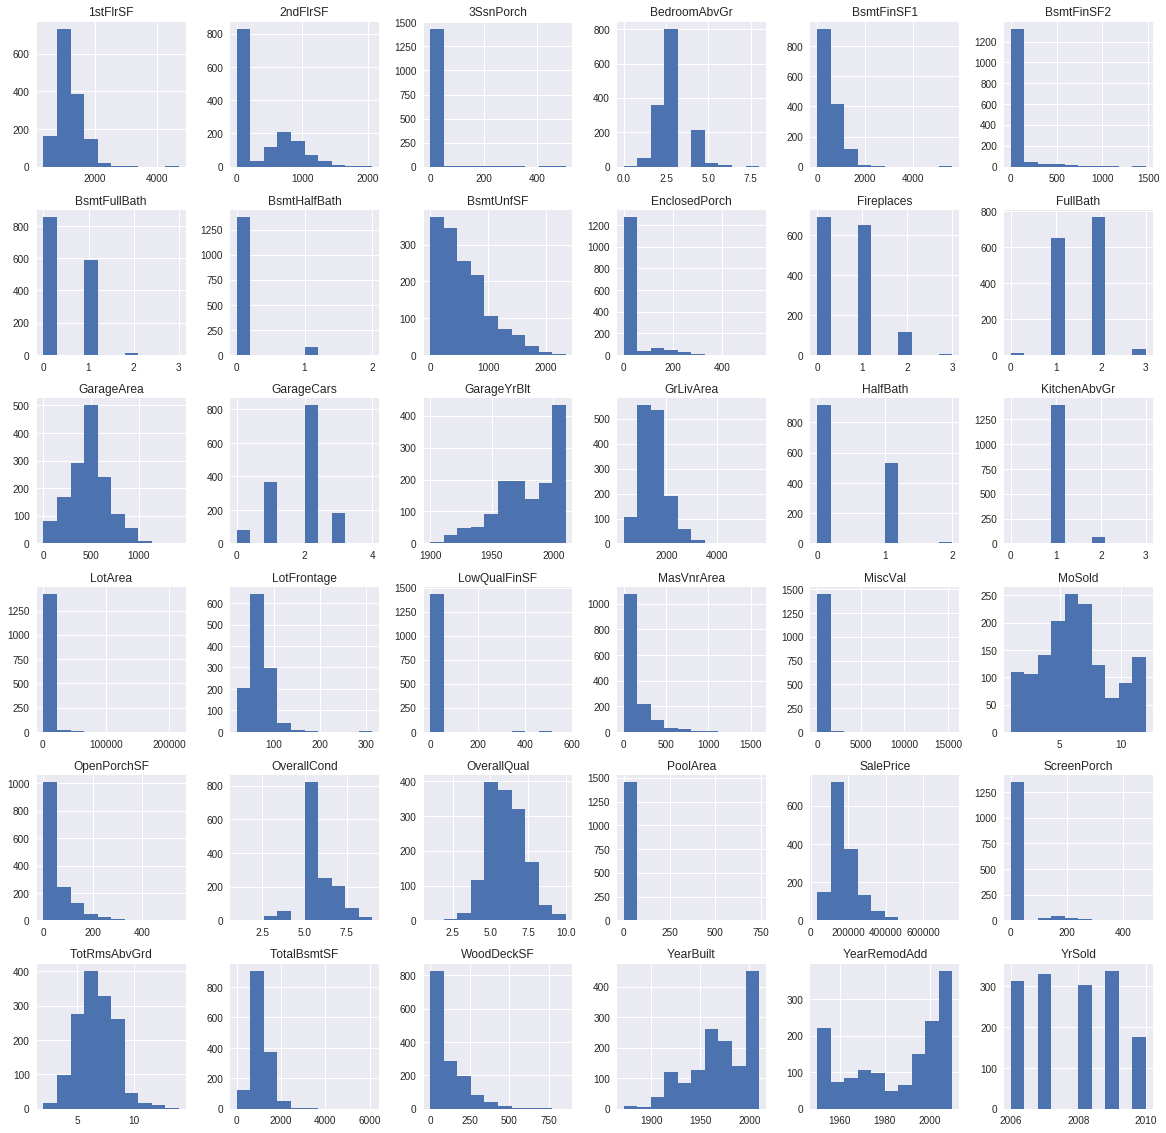

In [25]:
#No outlier numberic columns
#no_out_num_col_data = no_outlier_df[[col for col in no_outlier_df.columns if no_outlier_df[col].dtypes == np.dtype('int64') or no_outlier_df[col].dtypes == np.dtype('float64')]]

num_column_data = df[[col for col in df.columns if df[col].dtypes 
                      == np.dtype('int64') or df[col].dtypes ==  np.dtype('float64')]]

num_column_data.hist(layout= (6,6), figsize=(20,20))


#### What are your observations? Add them to this markdown cell.

---



Two featues, overall quality and total rooms above ground seem to have more of the normal distribution while vast majority of datas showed some sort of steep skewness. Features like Lot Area or Lot Frontage showed great possibility of outliers with some datas that are quite extreme relative to the overall distribution of the data. 

### C. Plot the Numeric Columns Against `SalePrice` using scatter plots.

In [17]:
#SalePrice removal from Numeric Columns data
no_saleprice_data = no_out_num_col_data.drop('SalePrice', axis=1)


/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


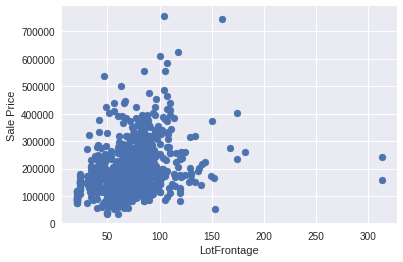

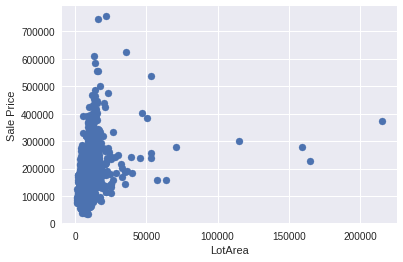

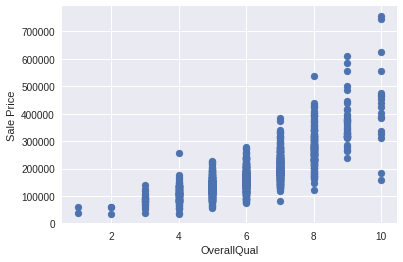

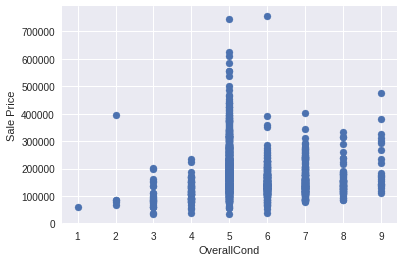

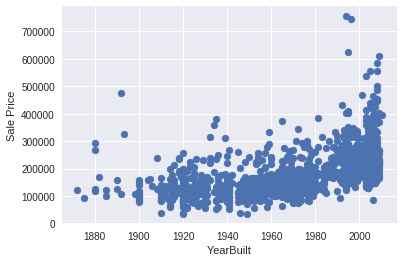

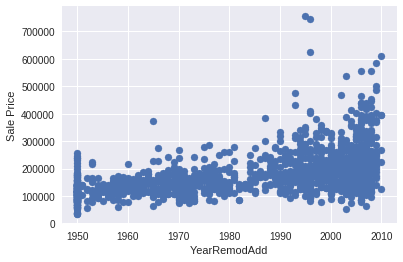

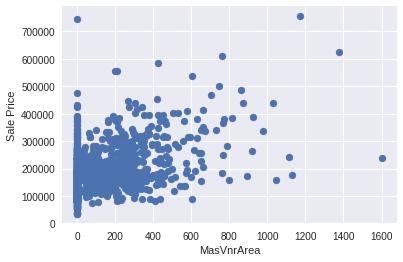

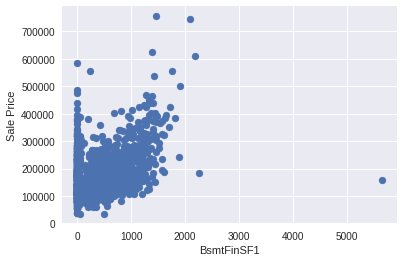

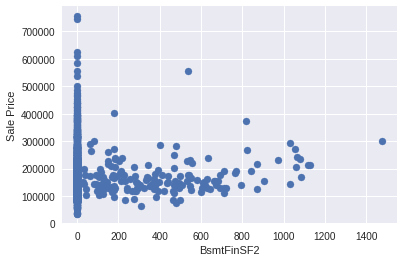

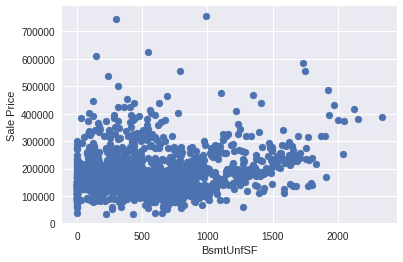

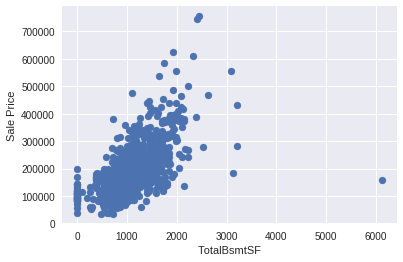

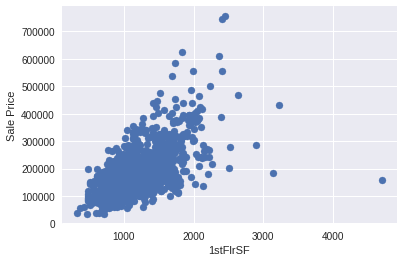

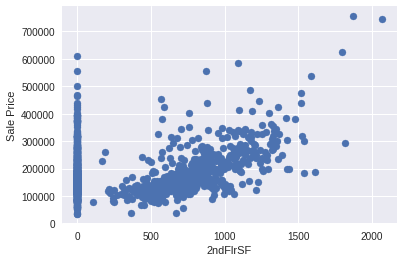

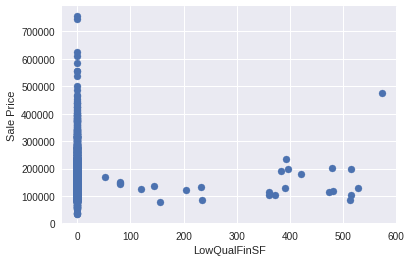

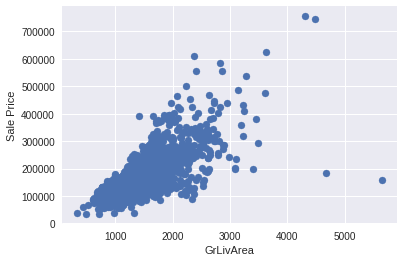

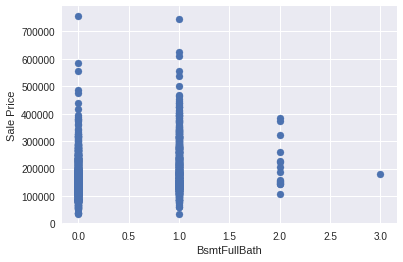

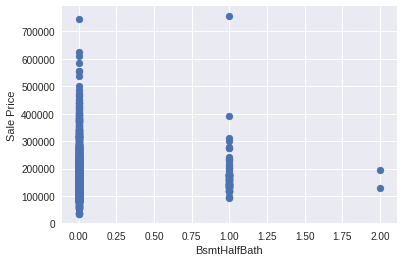

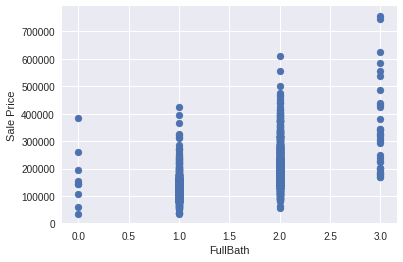

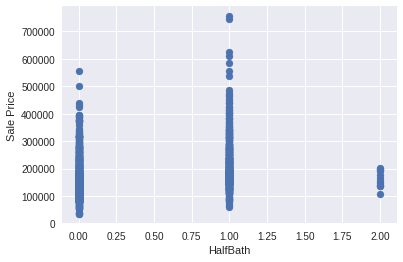

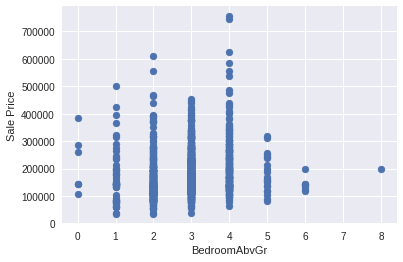

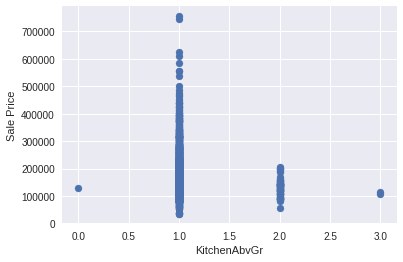

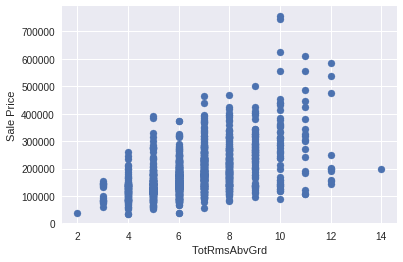

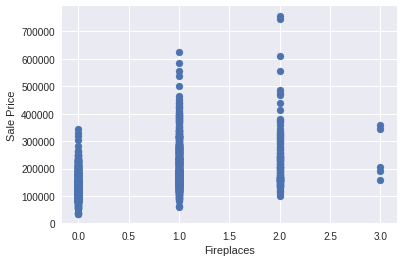

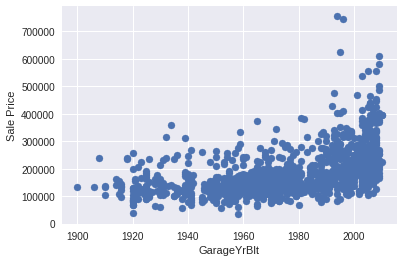

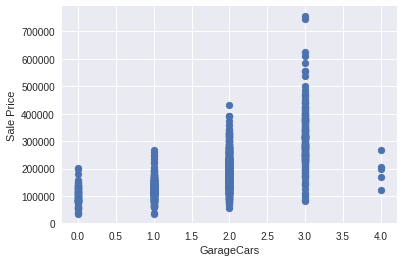

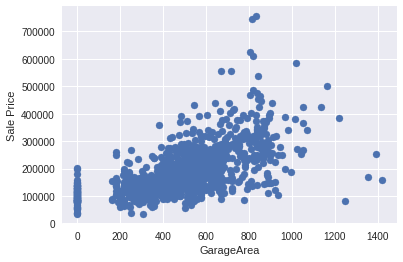

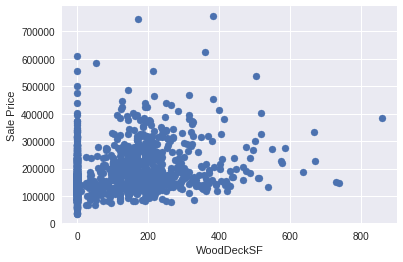

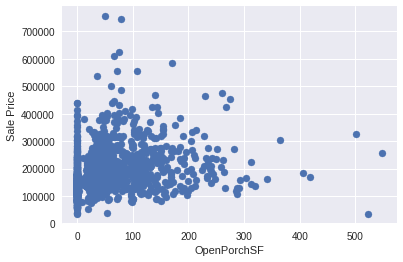

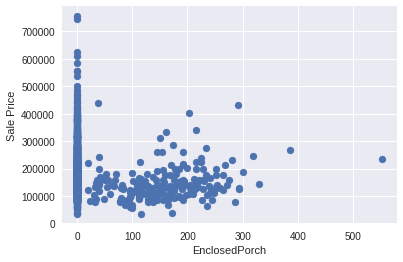

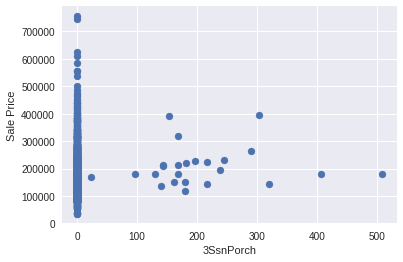

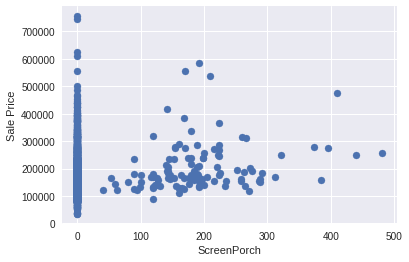

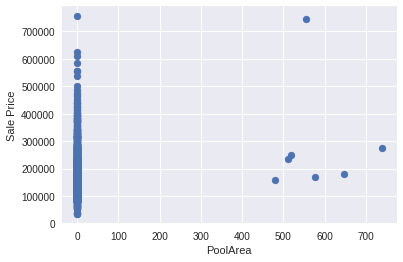

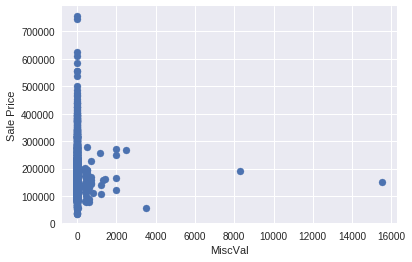

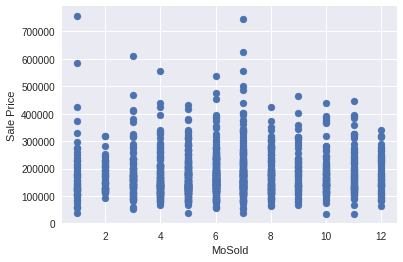

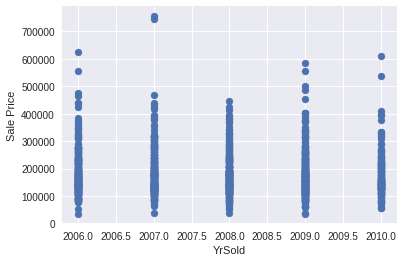

In [18]:
for col in no_saleprice_data:
    fig, ax = plt.subplots()
    plt.scatter(df[col], df['SalePrice'])
    plt.ylabel('Sale Price')
    plt.xlabel(col)
   

#### What are your observations? Add them to this markdown cell.

---


Although many of them didn't show any linear relationship with Sale Price, some features like Garage Area, Wood Deck SF, Open Porch SF showed similar pattern of heavy percentage of them distributed in lower value of Sale Price and each features, excluding the 0 inputs. 2nd Floor SF and Ground Living Area showed a positive correlation with Sale Price. 

### D. Use bar plots to plot categorical features against `SalePrice`. 

**HINT:** Look up how to create bar plots in `matplotlib`. You will have to transform the data before you can create a bar plot! Also, look up [how to plot error bars](https://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-with-error-bars) so you can also observe the variability in your data!

In [9]:
cate_column_data = df[[col for col in df.columns if df[col].dtypes == np.dtype('object')]]
#make another one with no_outlier_df
#no_out_cate_col_data = no_outlier_df[[col for col in no_outlier_df.columns if no_outlier_df[col].dtypes == np.dtype('object')]]


/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


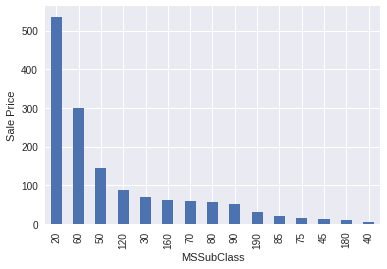

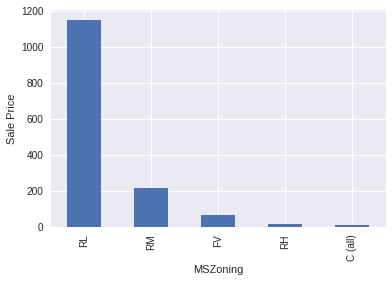

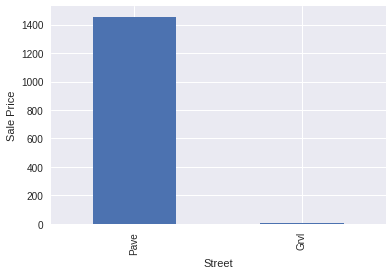

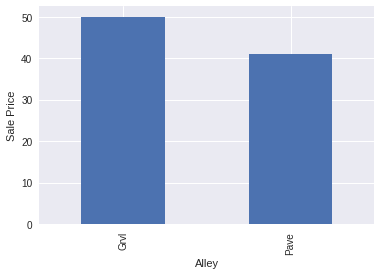

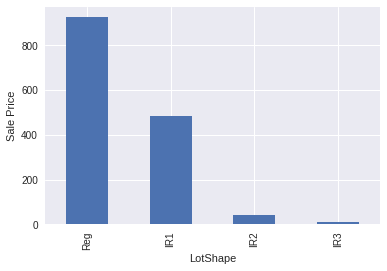

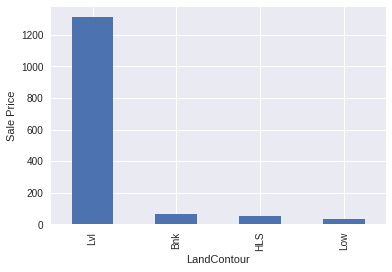

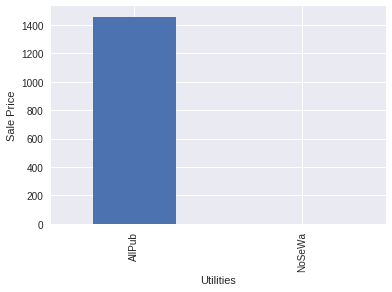

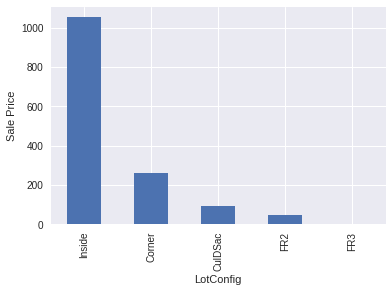

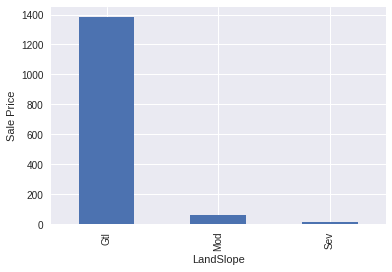

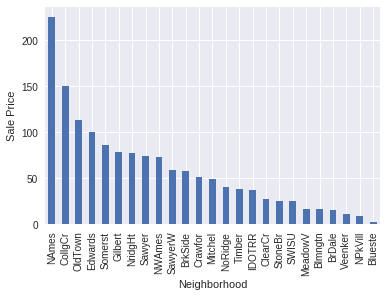

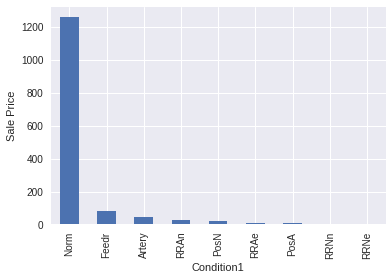

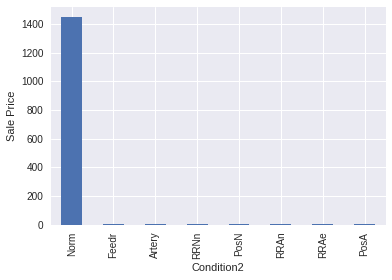

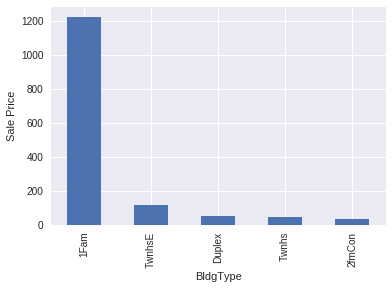

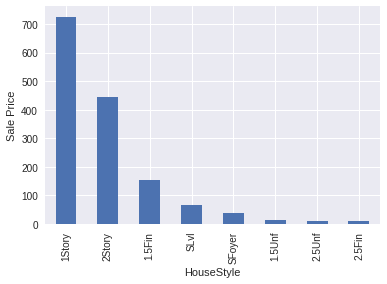

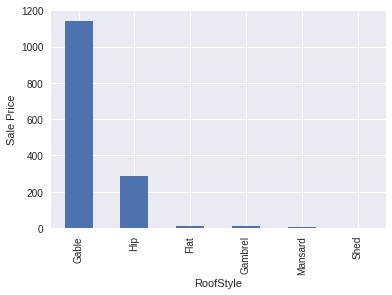

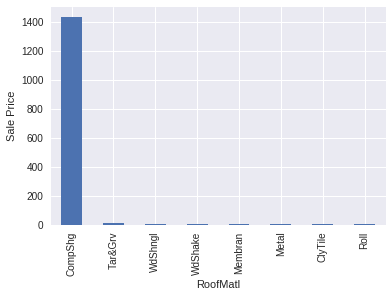

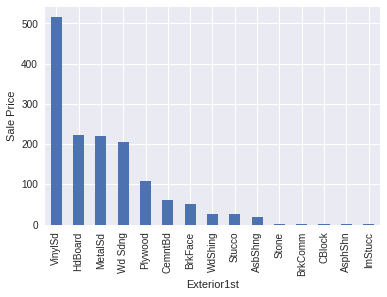

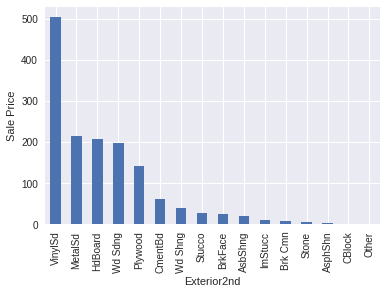

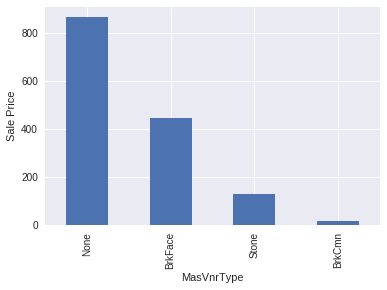

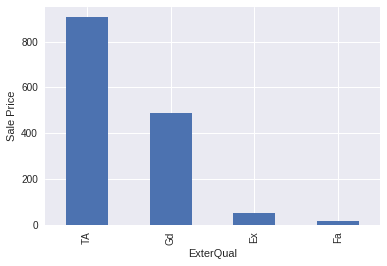

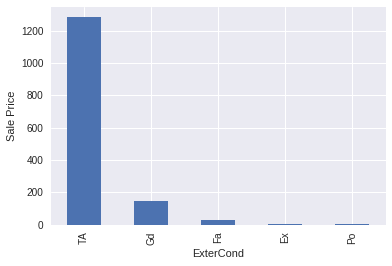

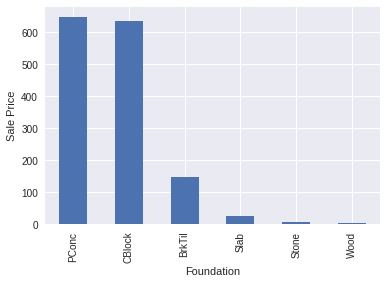

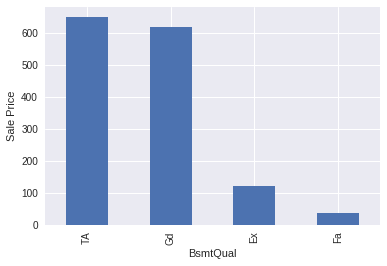

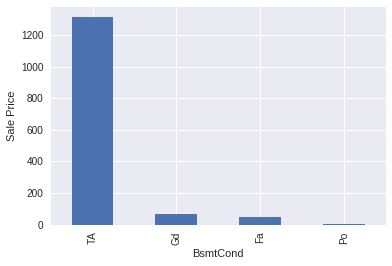

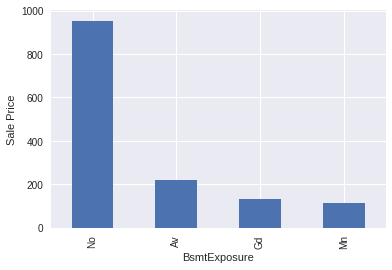

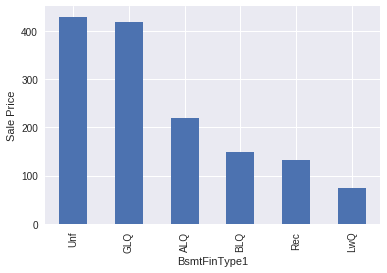

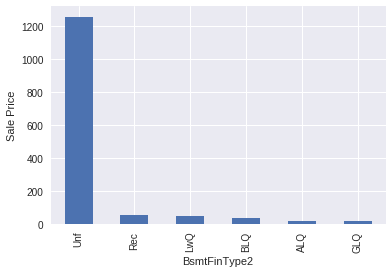

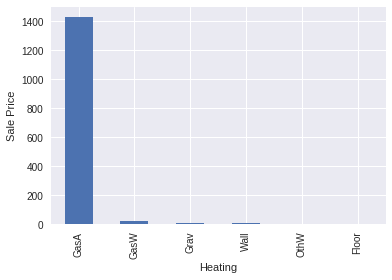

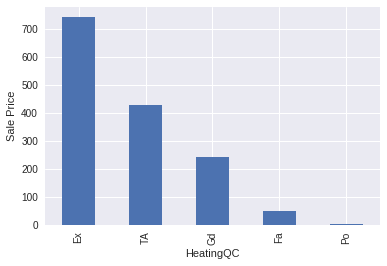

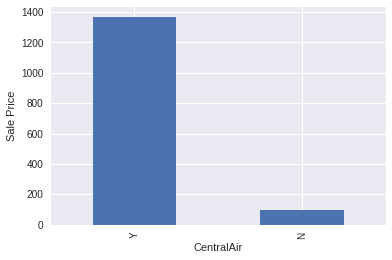

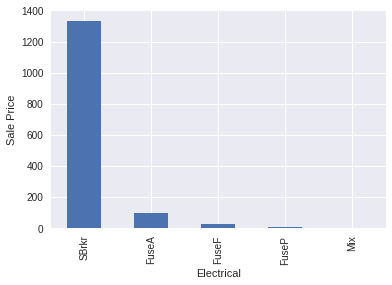

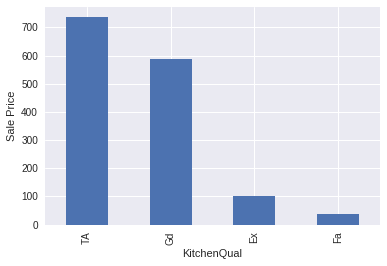

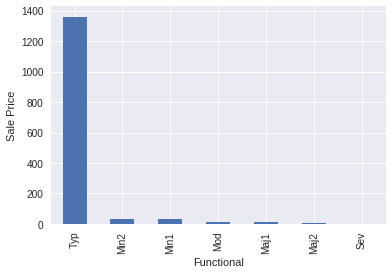

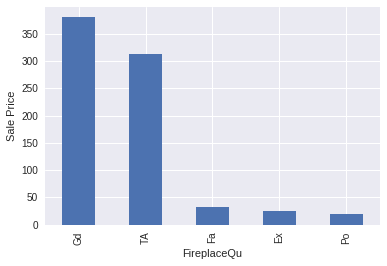

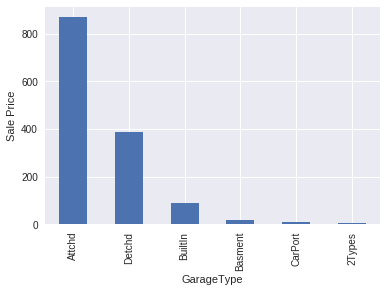

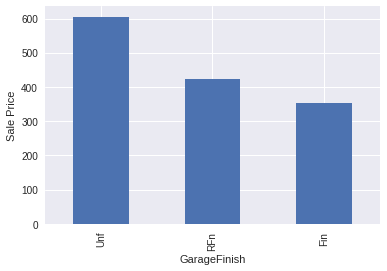

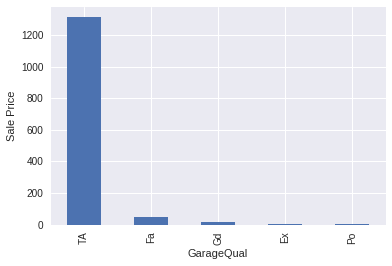

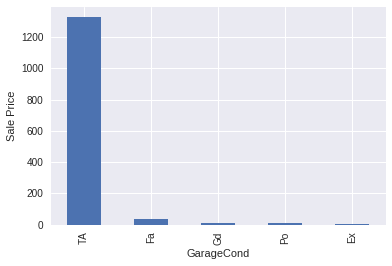

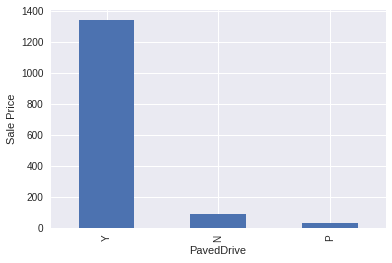

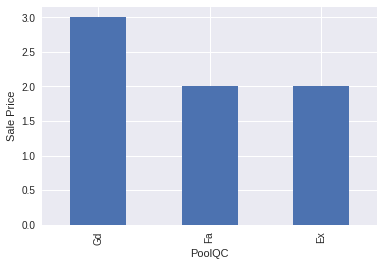

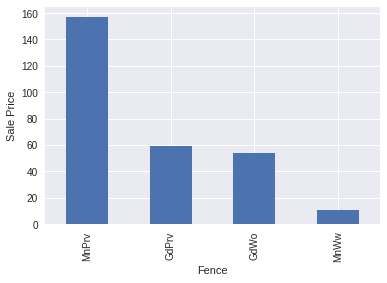

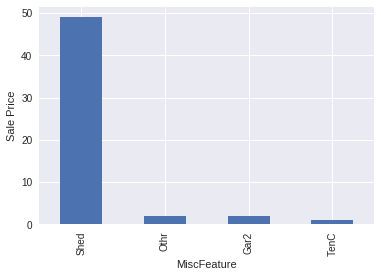

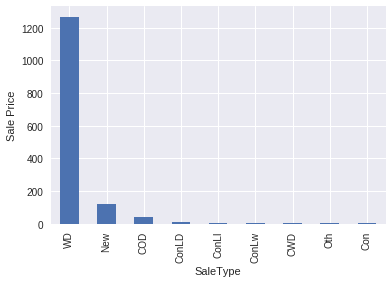

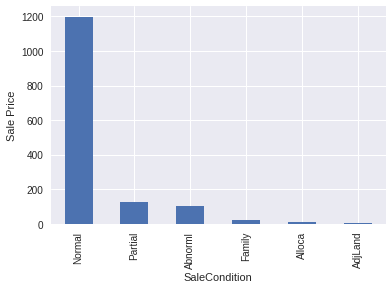

In [21]:
for col in cate_column_data:
    fig, ax = plt.subplots()
    plt.ylabel('Sale Price')
    plt.xlabel(col)
    counts= cate_column_data[col].value_counts()
    counts.plot.bar()


#### What are your observations? Add them to this markdown cell.

---



It is quite clear that most of categorical features have uneven spread of data, usually heavely positioned with one type of the feature. This might mean that most of the homes in Ames share similar features all across. However, this isn't definite proof that certain feature is driving the price for each house high. It could be that just large value count of certain feature will be apparent in many of the categorical columns.

## 3. Preprocessing

### A. Identify and Remove Outliers for `SalePrice`

Make sure to... 
* Plot a histogram of the housing price. 
* Supply a definition of what an outlier is by your criteria. Does Tukey's method make sense with 1.5 times the interquartile range, or should that range be increased or decreased?
* Use masking to remove the outliers as you've defined them.

(34900, 755000)

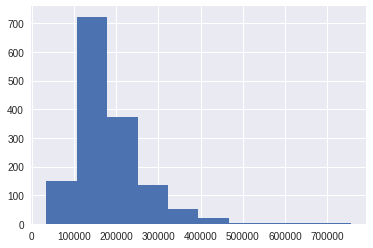

In [5]:
price_data = df["SalePrice"]
price_data.hist()
price_data.min(),price_data.max()

In [6]:
#Tukey's range
q3_price_data = np.percentile(price_data, 75)
q1_price_data = np.percentile(price_data, 25)
int_q_range = q3_price_data - q1_price_data
range_tukey = 1.5 * int_q_range
lower_fence = q1_price_data - range_tukey
upper_fence = q3_price_data + range_tukey

In [7]:
too_high = price_data > upper_fence
too_high.value_counts()

False    1399
True       61
Name: SalePrice, dtype: int64

In [8]:
too_low = price_data < lower_fence
too_low.value_counts()

False    1460
Name: SalePrice, dtype: int64

There are none that was lower than the Tukey's lower range while there are 61 that is out of the upper range. Since the histogram does show that they are skewness to the left, lower-end of the price spectrum, there are values in the higher price range that is more deviant from other data points. The 61 data points that are more less abnormal consists of 4.17% of the entire dataset. This amount of outlier does seem logical. 

In [9]:
61/1460

0.04178082191780822

In [10]:
price_df = pd.DataFrame(price_data)
price_df['upper'] = too_high
price_df['lower'] = too_low

no_outlier_df = df[df['SalePrice'] > lower_fence][df['SalePrice'] < upper_fence]
no_outlier_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### B. Fill missing data!

* How many null values are in each column? Make a bar plot showing this only for columns with missing data.
* For each column with nulls, do nulls represent anything? Read the data description.
  * Some columns that are appearing as _null_ might legitimately be known (ie: "na").  Double check the [data description](../data_description.txt) for proper value representation.  A feature might actually be better represented by "not available" or "na" rather than `NULL` or `NaN`.  There's a difference between `NULL` (unknown), and "NA" (not available).  It might mean the difference between "there isn't a garage" and "there is no garage data". 
* Fill null values for each column by imputation. Here are some common methods for imputation:
  1. Using domain knowledge to select an appropriate value.
  1. Value from a randomly selected row.
  2. Mean, median, or mode value of the series.
  3. Value estimated by a predictive model.
* Make sure to justify your method for filling null values.
  

In [11]:
for col in no_outlier_df.columns:
    if no_outlier_df[col].dtypes == np.dtype('int64') or no_outlier_df[col].dtypes == np.dtype('float64'):
        col_null_mask = no_outlier_df[col].isnull()
        no_outlier_df[col] = no_outlier_df[col].mask(col_null_mask, df[col].mean())
    else:
        col_null_mask = no_outlier_df[col].isnull()
        no_outlier_df[col] = no_outlier_df[col].mask(col_null_mask, 'NA')
no_outlier_df.sample(10)
            

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
704,190,RM,76.0,7630,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,MnPrv,NA,0,5,2010,WD,Normal,140000
657,20,RL,72.0,10007,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,MnPrv,NA,0,8,2008,WD,Normal,145500
120,60,RL,65.0,8461,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,7,2006,New,Partial,163990
503,20,RL,70.0,9170,Pave,NA,Reg,Lvl,AllPub,Corner,...,0,NA,GdPrv,Shed,400,4,2007,WD,Normal,140000
244,160,RL,75.0,10762,Pave,NA,Reg,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,4,2009,WD,Normal,120000
764,60,RL,82.0,9430,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,7,2009,WD,Normal,337000
217,20,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,4,2008,WD,Normal,210000
914,90,RH,82.0,6270,Pave,NA,Reg,HLS,AllPub,Inside,...,0,NA,NA,NA,0,8,2007,WD,Normal,145000
986,190,RL,68.0,10880,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,8,2008,ConLD,Normal,125000


Verify that you have *truly* eliminated all the null values!

In [12]:
no_outlier_df.isnull().values.any()

False

### C. Create dummy variables for categorical columns

Use `pd.get_dummies()` to turn your categorical features into numeric features. Make sure there are **no null values** in your dataset before you do this!

In [13]:

no_out_cate_col_data = no_outlier_df[[col for col in no_outlier_df.columns if no_outlier_df[col].dtypes == np.dtype('object')]]

dummy = pd.get_dummies(no_outlier_df)


### D. Split your data into a train and test set.

* Use `train_test_split` to hold out a test set. 
* Why do we hold out a test set?

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X= dummy.drop('SalePrice', axis=1)
y= no_outlier_df['SalePrice']

#train-test-split with 0.25 going to test (test size)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=42)


We hold out a test set because we need to understand how our model performs on data it hasn't seen. We may create a model that fits our training data very well but does not score well on the test set, suggesting that it won't predict well given new data. With a test set, we can understand how our model performs on unseen data.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Modeling

Now that you've completed your EDA, you can now use your training data to build a model to predict home price from your features! As far as regression methods, you've learned a few, including ordinary least squares (a.k.a. `LinearRegression`), `Lasso`, `Ridge`, and `ElasticNet`. 

### A. Benchmarking

As we get started with modeling we should have some basis for comparison to get a sense of what a "good" model is for this task. 

For this task, as we will be focusing on linear models, we will use the most naive of the linear models, the Linear Regression as our benchmark. 

In [17]:
from sklearn.linear_model import LinearRegression
print(X.shape)
print(y.shape)
ols = LinearRegression()
ols.fit(X_train,y_train)
ols.score(X_train, y_train)
ols.score(X_test, y_test)

(1399, 318)
(1399,)


0.85868223649038389

#### Results Dictionary

Make a results `list` to hold your results. After each model fit and score, you will add a dictionary of your results to this list using `.append()`. This will give you a list of dictionaries ... perfect for a DataFrame!

This is the pattern you will be using:

In [18]:
example_results = list()
result_1 = {'name':'test1','dataset' : 'train','preprocessing': 'raw','score': '1 bajillion'}
example_results.append(result_1)
result_2 = {'name':'test1','dataset' : 'train','preprocessing': 'scaled','score': '20 bajillion'}
example_results.append(result_2)

Then we pass the results list to pass to a DataFrame.

In [19]:
pd.DataFrame(example_results)

,dataset,name,preprocessing,score
0,train,test1,raw,1 bajillion
1,train,test1,scaled,20 bajillion


This gives us a convenient tool for manipulating our results and tracking our work ... our old friend, Pandas!

#### Make a new results list.

In [20]:
results = list()

#### Raw Benchmark

Instantiate a new `LinearRegression` model and save it as `benchmark_raw`.

In [21]:
benchmark_raw = LinearRegression()

- Fit the `benchmark_raw` model against the raw training data. 
- Score the `benchmark_raw` model against both the raw training set and the raw testing set. 
- Apprend a results dictionary to the `results` list. 

You could do this by

    results.append({'name':'benchmark',
                    'model': benchmark_raw,
                    'dataset' : 'train',
                    'preprocessing': 'raw',
                    'score': raw_train_score})
                    
Of course you can store a model in a dictionary!                    

In [22]:
benchmark_raw.fit(X_train, y_train)
raw_train_score = benchmark_raw.score(X_train, y_train)
raw_test_score = benchmark_raw.score(X_test, y_test)

results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

#### Scaled Benchmark

- Fit the `benchmark_scaled` model against the scaled training data. 
- Score the `benchmark_scaled` model against both the scaled training set and the scaled testing set. 
- Write the results to the results `list`. 

In [23]:
benchmark_scaled = LinearRegression()
benchmark_scaled.fit(X_train_scaled, y_train)
scaled_train_score = benchmark_scaled.score(X_train_scaled, y_train)
scaled_test_score = benchmark_scaled.score(X_test_scaled, y_test)
results.append({'name':'benchmark',
                'model':benchmark_scaled,
                'dataset' : 'train',
                'preprocessing': 'scale',
                'score': scaled_train_score})
results.append({'name':'benchmark',
                'model':benchmark_scaled,
                'dataset' : 'test',
                'preprocessing': 'scale',
                'score': scaled_test_score})

Use a DataFrame to display your results.

In [24]:
pd.DataFrame(results)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.455711e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,8.586822e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scale,9.455609e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scale,-4.097391e+23


#### What are your observations? Add them to this markdown cell.

---


The score for the raw train dataset did show great precision (R2) however, there are possibilities with over-fitting the data points with this model. Scaled test data showed a negative R2 score. Unsure why negative value would come out after squaring (imaginary value?). This lead substantial better socre in raw data for test dataset whule there were very little difference in score between raw and scale data for train dataset. 

### B. Naive Regularization

Next, prepare a series of fits using the three regularized linear regression models with their default settings.

Perform each of these against both the raw and the scaled data. In this section, you should be fitting six models.

- A naive Ridge Regression against the raw data
- A naive Lasso Regression against the raw data
- A naive ElasticNet Regression against the raw data
- A naive Ridge Regression against the scaled data
- A naive Lasso Regression against the scaled data
- A naive ElasticNet Regression against the scaled data

**NOTE:** By "naive" we mean using all of the default settings.

In [25]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [26]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_raw_score = ridge.score(X_train, y_train)
ridge_raw_test = ridge.score(X_test, y_test)

ridge.fit(X_train_scaled, y_train)
ridge_scale_score = ridge.score(X_train_scaled, y_train)
ridge_scale_test = ridge.score(X_test_scaled, y_test)

lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_raw_score = lasso.score(X_train, y_train)
lasso_raw_test = lasso.score(X_test, y_test)

lasso.fit(X_train_scaled, y_train)
lasso_scale_score = lasso.score(X_train_scaled, y_train)
lasso_scale_test = lasso.score(X_test_scaled, y_test)

elastic= ElasticNet()
elastic.fit(X_train, y_train)
elastic_raw_score = elastic.score(X_train, y_train)
elastic_raw_test = elastic.score(X_test, y_test)

elastic.fit(X_train_scaled, y_train)
elastic_scale_score = elastic.score(X_train_scaled, y_train)
elastic_scale_test = elastic.score(X_test_scaled, y_test)



results.append({'name':'Ridge',
                'model':ridge,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': ridge_raw_score})
results.append({'name':'Ridge',
                'model':ridge,
                'dataset' : 'train',
                'preprocessing': 'scale',
                'score': ridge_scale_score})
results.append({'name':'Ridge',
                'model':ridge,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': ridge_raw_test})
results.append({'name':'Ridge',
                'model':ridge,
                'dataset' : 'test',
                'preprocessing': 'scale',
                'score': ridge_scale_test})

results.append({'name':'Lasso',
                'model':lasso,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': lasso_raw_score})
results.append({'name':'Lasso',
                'model':lasso,
                'dataset' : 'train',
                'preprocessing': 'scale',
                'score': lasso_scale_score})
results.append({'name':'Lasso',
                'model':lasso,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': lasso_raw_test})
results.append({'name':'Lasso',
                'model':lasso,
                'dataset' : 'test',
                'preprocessing': 'scale',
                'score': lasso_scale_test})

results.append({'name':'ElasticNet',
                'model':elastic,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': elastic_raw_score})
results.append({'name':'ElasticNet',
                'model':elastic,
                'dataset' : 'train',
                'preprocessing': 'scale',
                'score': elastic_scale_score})
results.append({'name':'ElasticNet',
                'model':elastic,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': elastic_raw_test})
results.append({'name':'ElasticNet',
                'model':elastic,
                'dataset' : 'test',
                'preprocessing': 'scale',
                'score': elastic_scale_test})

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [27]:
def append_to_results_ridge (dataset, preprocessing, score):
    results=[]
    results.append({'name':'Ridge',
                'model':Ridge(),
                'dataset' : str(dataset),
                'preprocessing': str(preprocessing),
                'score': score})
    return results


def append_to_results_lasso (dataset,preprocessing, score):
    results=[]
    results.append({'name':'Lasso',
                'model':Lasso(),
                'dataset' : str(dataset),
                'preprocessing': str(preprocessing),
                'score': score})
    return results

def append_to_results_elastic (dataset,preprocessing, score):
    results=[]
    results.append({'name':'ElasticNet',
                'model':ElasticNet(),
                'dataset' : str(dataset),
                'preprocessing': str(preprocessing),
                'score': score})
    return results


Note that we see warnings here. As we are in an exploration phase with our model, this is acceptable.

Use a DataFrame to store your `results` as `results_df`. By this we mean, save the `results` list into a new dataframe so that you can manipulate the DataFrame.

In [28]:
results_df = pd.DataFrame(results)
results_df.sort_values('score', ascending=False)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.455711e-01
9,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,scale,9.455701e-01
5,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,scale,9.455639e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scale,9.455609e-01
8,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,9.455196e-01
4,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,raw,9.239977e-01
13,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,scale,9.133924e-01
6,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,raw,8.886730e-01
15,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,scale,8.857955e-01
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,scale,8.710223e-01


#### Display just the raw test results using pandas

You can do this using pandas indexing as follows

    results_df[(results_df.preprocessing == 'raw') & 
               (results_df.dataset == 'test')]

In [29]:
results_df[(results_df.preprocessing == 'raw')].sort_values('score', ascending=False)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.945571
8,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,0.945520
4,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,raw,0.923998
6,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,raw,0.888673
10,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,0.868124
14,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,raw,0.867383
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.858682
12,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,raw,0.825525


#### What are your observations? Add them to this markdown cell.

---



Although none of the regularized model was able to score higher than the benchmark, both Lasso and Ridge test data score came out higher than benchmark score.
Lasso showed great train score while having about 0.077 less score for test data score. 
Ridge also showed higher than 0.92 in train score while having 0.035 less score for test data.
Comparing this to the benchmark, which showed the greatest train score while having the biggest gap with test data score of 0.086889. 

#### Display just the scaled test results

In [30]:
results_df[(results_df.preprocessing == 'scale')].sort_values('score', ascending=False)

,dataset,model,name,preprocessing,score
9,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,scale,9.455701e-01
5,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,scale,9.455639e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scale,9.455609e-01
13,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,scale,9.133924e-01
15,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,scale,8.857955e-01
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,scale,8.710223e-01
11,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,scale,8.665002e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scale,-4.097391e+23


#### What are your observations? Add them to this markdown cell.

---



By going through the scale of the X train and test data, the score tends to improve, espcially the train data R2 scores. Lasso scored slightly higher than Ridge and Benchmark for train score while having biggest gap with test score. A part from the benchmark, there were no abnormal (negative values) precision found with other models.  

These are your benchmark results. You will refer to these for analysis during the next phase.

#### Display just the Benchmark models

In [31]:
results_df[(results_df.name == 'benchmark')]

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.455711e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,8.586822e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scale,9.455609e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scale,-4.097391e+23


#### Display just the Ridge models

In [32]:
results_df[(results_df.name == 'Ridge')]

,dataset,model,name,preprocessing,score
4,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,raw,0.923998
5,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,scale,0.945564
6,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,raw,0.888673
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",Ridge,scale,0.871022


#### Display just the Lasso models

In [33]:
results_df[(results_df.name == 'Lasso')]

,dataset,model,name,preprocessing,score
8,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,0.945520
9,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,scale,0.945570
10,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,raw,0.868124
11,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,scale,0.866500


#### Display just the Elasticnet models

In [34]:
results_df[(results_df.name == 'ElasticNet')]

,dataset,model,name,preprocessing,score
12,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,raw,0.825525
13,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,scale,0.913392
14,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,raw,0.867383
15,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,scale,0.885796


#### What are your observations? Add them to this markdown cell.

---



Aptly so, each model showed higher train score for both raw and scaled datas. Both Ridge and Lasso showed greater gap between the train and test scores. ElasticNet showed smaller score while having smaller gap with test score. 

### C. Cross-validated models

Import the Cross-Validation Models for each of the Regularized Linear Models

In [35]:
cv_results = list()

In [36]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

Perform the cross-validation using an `np.logspace(-2,4,7)`.

In [52]:
alpha_range = np.logspace(-2,4,7)

ridgecv = RidgeCV(alphas=alpha_range,cv=10)
ridgecv_fit = ridgecv.fit(X_train, y_train)
ridgecv_raw_score = ridgecv.score(X_train, y_train)
ridgecv_raw_test = ridgecv.score(X_test, y_test)
ridgecv_fit_scale = ridgecv.fit(X_train_scaled, y_train)
ridgecv_scale_score = ridgecv.score(X_train_scaled, y_train)
ridgecv_scale_test = ridgecv.score(X_test_scaled, y_test)


lassocv = LassoCV(alphas=alpha_range, cv=10)
lassocv_fit = lassocv.fit(X_train, y_train)
lassocv_raw_score = lassocv.score(X_train, y_train)
lassocv_raw_test = lassocv.score(X_test, y_test)
lassocv_fit_scale =lassocv.fit(X_train_scaled, y_train)
lassocv_scale_score = lassocv.score(X_train_scaled, y_train)
lassocv_scale_test = lassocv.score(X_test_scaled, y_test)


elasticcv = ElasticNetCV(alphas = alpha_range, cv=10)
elasticcv_fit = elasticcv.fit(X_train, y_train)
elasticcv_raw_score = elasticcv.score(X_train, y_train)
elasticcv_raw_test = elasticcv.score(X_test, y_test)
elasticcv_fit_scale = elasticcv.fit(X_train_scaled, y_train)
elasticcv_scale_score = elasticcv.score(X_train_scaled, y_train)
elasticcv_scale_test = elasticcv.score(X_test_scaled, y_test)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of

In [53]:
def append_to_results_ridgecv (dataset, preprocessing, score):
    cv_results.append({'name':'RidgeCV',
                'model':ridgecv,
                'dataset' : str(dataset),
                'preprocessing': str(preprocessing),
                'score': score})
    return cv_results

In [54]:
def append_to_results_elasticcv (dataset,preprocessing, score):
    cv_results.append({'name':'ElasticNetCV',
                'model':elasticcv,
                'dataset' : str(dataset),
                'preprocessing': str(preprocessing),
                'score': score})
    return cv_results

In [55]:
def append_to_results_lassocv (dataset,preprocessing, score):
    cv_results.append({'name':'LassoCV',
                'model':lassocv,
                'dataset' : str(dataset),
                'preprocessing': str(preprocessing),
                'score': score})
    return cv_results

In [56]:
cv_results=[]

In [57]:

append_to_results_ridgecv('train', 'raw', ridgecv_raw_score)
append_to_results_ridgecv('train', 'scale', ridgecv_scale_score)
append_to_results_ridgecv('test', 'scale', ridgecv_scale_test)
append_to_results_ridgecv('test', 'raw', ridgecv_raw_test)

append_to_results_lassocv('train', 'raw', lassocv_raw_score)
append_to_results_lassocv('train', 'scale', lassocv_scale_score)
append_to_results_lassocv('test', 'scale', lassocv_scale_test)
append_to_results_lassocv('test', 'raw', lassocv_raw_test)

append_to_results_elasticcv('train', 'raw', elasticcv_raw_score)
append_to_results_elasticcv('train', 'scale', elasticcv_scale_score)
append_to_results_elasticcv('test', 'scale', elasticcv_scale_test)
append_to_results_elasticcv('test', 'raw', elasticcv_raw_test)



[{'dataset': 'train',
  'model': RidgeCV(alphas=array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
           1.00000e+02,   1.00000e+03,   1.00000e+04]),
      cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
      scoring=None, store_cv_values=False),
  'name': 'RidgeCV',
  'preprocessing': 'raw',
  'score': 0.89822707748483699},
 {'dataset': 'train',
  'model': RidgeCV(alphas=array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
           1.00000e+02,   1.00000e+03,   1.00000e+04]),
      cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
      scoring=None, store_cv_values=False),
  'name': 'RidgeCV',
  'preprocessing': 'scale',
  'score': 0.89330366928625737},
 {'dataset': 'test',
  'model': RidgeCV(alphas=array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
           1.00000e+02,   1.00000e+03,   1.00000e+04]),
      cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
      scoring=None, store_cv_values=False),

In [58]:
cv_results_df = pd.DataFrame(cv_results)
cv_results_df.sort_values('score', ascending=False)

,dataset,model,name,preprocessing,score
5,train,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",LassoCV,scale,0.920247
4,train,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",LassoCV,raw,0.916484
9,train,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",ElasticNetCV,scale,0.913392
7,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",LassoCV,raw,0.910806
8,train,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",ElasticNetCV,raw,0.905322
6,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",LassoCV,scale,0.899459
0,train,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",RidgeCV,raw,0.898227
3,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",RidgeCV,raw,0.897551
11,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",ElasticNetCV,raw,0.894774
1,train,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",RidgeCV,scale,0.893304


#### Display just the raw test results

In [59]:
cv_results_df[(cv_results_df.preprocessing == 'raw')]

,dataset,model,name,preprocessing,score
0,train,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",RidgeCV,raw,0.898227
3,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",RidgeCV,raw,0.897551
4,train,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",LassoCV,raw,0.916484
7,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",LassoCV,raw,0.910806
8,train,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",ElasticNetCV,raw,0.905322
11,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",ElasticNetCV,raw,0.894774


#### Display just the scaled test results

In [60]:
cv_results_df[(cv_results_df.preprocessing == 'scale')]

,dataset,model,name,preprocessing,score
1,train,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",RidgeCV,scale,0.893304
2,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",RidgeCV,scale,0.875084
5,train,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",LassoCV,scale,0.920247
6,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",LassoCV,scale,0.899459
9,train,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",ElasticNetCV,scale,0.913392
10,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",ElasticNetCV,scale,0.885796


### D. Model Selection

Interpret Regression Metrics for each of your models. Choose one of the following:

* R2
* MSE / RMSE
* MAE

What are your top 3 performing models? 

In [64]:
from sklearn import metrics
rmse1 ={}

y_pred_lassocv_fit_scale = lassocv_fit_scale.predict(X_test_scaled)
rmse1['Lasso_CV_Scaled']=np.sqrt(metrics.mean_squared_error(y_test, y_pred_lassocv_fit_scale))

y_pred_lassocv_fit = lassocv_fit.predict(X_test_scaled)
rmse1['Lasso_CV']=np.sqrt(metrics.mean_squared_error(y_test, y_pred_lassocv_fit))

y_pred_elasticcv_fit_scale = elasticcv_fit_scale.predict(X_test_scaled)
rmse1['ElasticNet_CV_Scaled']=np.sqrt(metrics.mean_squared_error(y_test, y_pred_elasticcv_fit_scale))

rmse1


{'ElasticNet_CV_Scaled': 19244.439335431634,
 'Lasso_CV': 18056.528541518655,
 'Lasso_CV_Scaled': 18056.528541518655}

In [46]:
from sklearn import metrics

rmse ={}

#RMSE for Linear Regression (Benchmark)
y_pred = benchmark_scaled.predict(X_test_scaled)
rmse['Linear Regression']=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

#RMSE for Ridge
y_pred_ridge = ridge.predict(X_test_scaled)
rmse['Ridge'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))

#RMSE for Lasso
y_pred_lasso = lasso.predict(X_test_scaled)
rmse['Lasso']=np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))

#RMSE for ElasticNet
y_pred_elastic = elastic.predict(X_test_scaled)
rmse['ElasticNet'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred_elastic))

rmse

{'ElasticNet': 19244.439335431634,
 'Lasso': 20806.740203407673,
 'Linear Regression': 36451669742017568.0,
 'Ridge': 20451.303462032847}

While regularized models showed error measures that were not too far away from each other, Linear Regression model showed substantial amount of RMSE. Looking back at the scores for benchmark, this substantial difference in prediction might explain why the test data score for scaled benchmark model was so poor (negative value). The model that generated that much error with train data should show poor precision. Three regularized models on the other hand showed error amount of around 20,000 in house price. Knowing that mean sale price was about 180921.19 with standard deviation of 79442.50288288662, the model isn't anything near perfect but does corresponds to the rough overall precision of .9


## Explain the bias / variance tradeoff

Why do regularized models perform better on your test set?

In [47]:
ridgecv.alpha_

1000.0

In [48]:
lassocv.alpha_

1000.0

In [49]:
elasticcv.alpha_

1.0

The point of regularizing the model is to avoid the over fit of the data. By resticting the impact of the certain predictors, high bias will be decreased. If the model is too flexible and overfitting the data, it is losing generalization ability by containing too much noise with high variance. While inflexible model can't describe dataset properly by underfitting too much data points. 
By going through the croos validation, the optimal hyperparameters are determined and let us decide where the bias/variance tradeoff is optimized. As shown above, ridge and lasso are optimized at alpha = 1000 while ElasticNet was optimized at alpha=1. It is interesting in that although ElasticNet didn't score the highest in the precision in both train or test dataset, they gave the smallest error. 

### Interpreting coefficients

For your best model, 

* plot relevant coefficients using the `plot_coef` functoin.


In [50]:
def plot_coef(model, top_n = 10):
    '''
    Plots the magnitude of top and bottom n coefficients
    '''
    cols = X_train.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(top_n)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([top_10, bottom_10], axis=0).plot.barh(x = 0, y = 1)

#### Plot your coefficients.

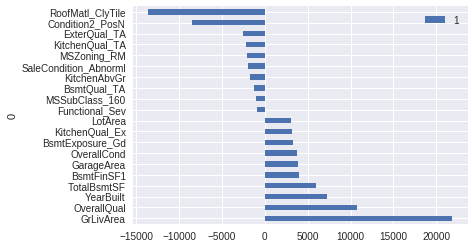

In [65]:
plot_coef(lassocv_fit_scale)

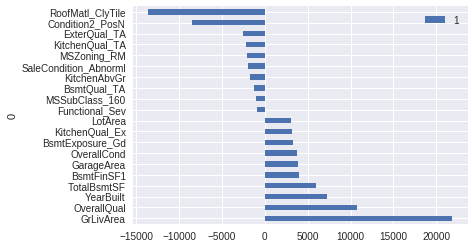

In [51]:
plot_coef(lassocv)

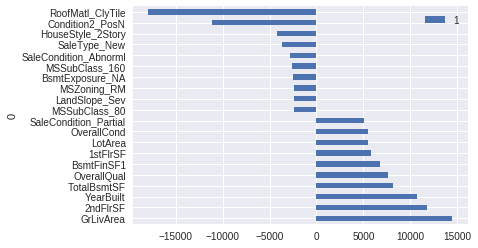

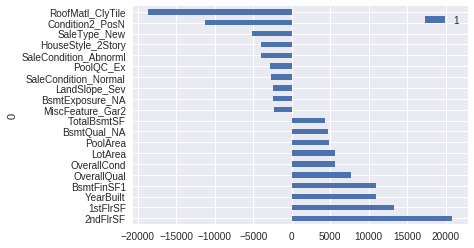

In [67]:
plot_coef(ridge)
plot_coef(lasso)

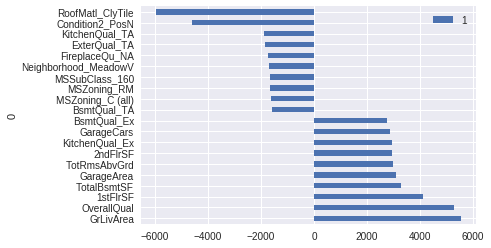

In [68]:
plot_coef(elastic)

#### Which features add / take away most value from a home?

All thee models agreed on one feature. Roof material clay tile takes away the most from a sale price and being next to off site features like park and greenbelt followed. These two features were dominant in their negative correlations with sale price. The best model, elasticnet agreed with the negatively correlated features but showed a bit different results for postive correlations. 2nd floor square footage seems to be one of the biggest factor of driving the price higher but, although still highly postively correlated (top 7), its correlation in elasticnet was not as important. According to ElasticNet, ground living area, overall quality, and 1st floor square footage were the top three and dominant relative to other features that drives the sale price higher. All three features are conventionally thought as important factors in house price. 